# IMPLEMENTATION OF SPEECH EMOTION RECONGITION

### Import the Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset
    

In [2]:
# we are loading the data from the system
paths=[]
labels=[]
for dirname, _, filenames in os.walk('D:\BS(AI)-4th-semester\programming for AI\Project reports\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split("_")[-1]
        label=label.split(".")[0]
        labels.append(label.lower())
print("Data is Loaded Successfully:")

Data is Loaded Successfully:


In [3]:
paths[:5]

['D:\\BS(AI)-4th-semester\\programming for AI\\Project reports\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\BS(AI)-4th-semester\\programming for AI\\Project reports\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\BS(AI)-4th-semester\\programming for AI\\Project reports\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\BS(AI)-4th-semester\\programming for AI\\Project reports\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\BS(AI)-4th-semester\\programming for AI\\Project reports\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
# Create a dataframe
import pandas as pd
df=pd.DataFrame()
# creating a columns
df["Speech"]=paths
df["Labels"]=labels
df.head()

,Speech,Labels
0,D:\BS(AI)-4th-semester\programming for AI\Proj...,angry
1,D:\BS(AI)-4th-semester\programming for AI\Proj...,angry
2,D:\BS(AI)-4th-semester\programming for AI\Proj...,angry
3,D:\BS(AI)-4th-semester\programming for AI\Proj...,angry
4,D:\BS(AI)-4th-semester\programming for AI\Proj...,angry


In [6]:
# checking how many labels we are having
df["Labels"].value_counts()

Labels
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='Labels', ylabel='count'>

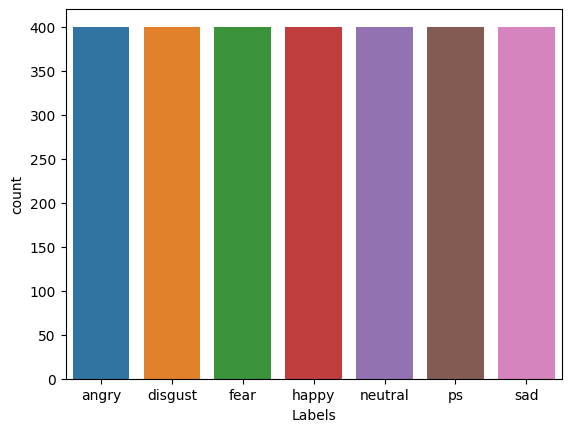

In [7]:
#converting the "Labels" column to a categorical data type in Pandas before creating the countplot because if we are not convert into the categorical
# numerical value then it throws an error i.e. could not convert string to float: 'angry'.

# Assuming df is your DataFrame with the "Labels" column

df["Labels"] = pd.Categorical(df["Labels"])
sns.countplot(data=df, x="Labels")

### Display the Audio File or wavefrom

In [8]:
import matplotlib.pyplot as plt
import librosa.display

def waveplot(data, sr, emotion):    # sr= sample rate
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, hop_length=512, x_axis="time", y_axis="log")
    plt.colorbar()
    plt.show()

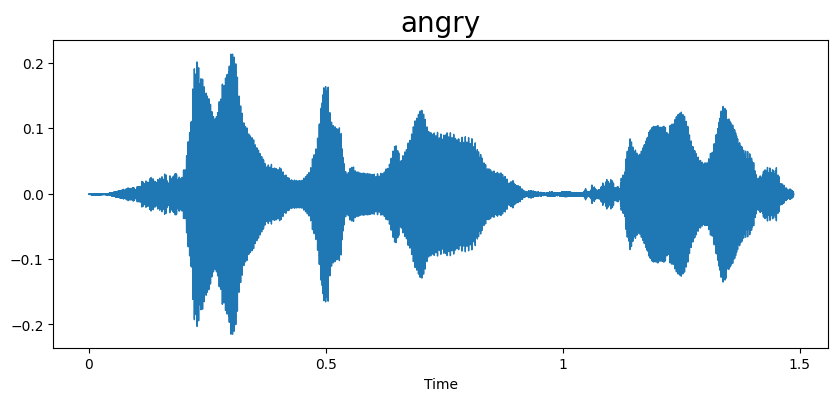

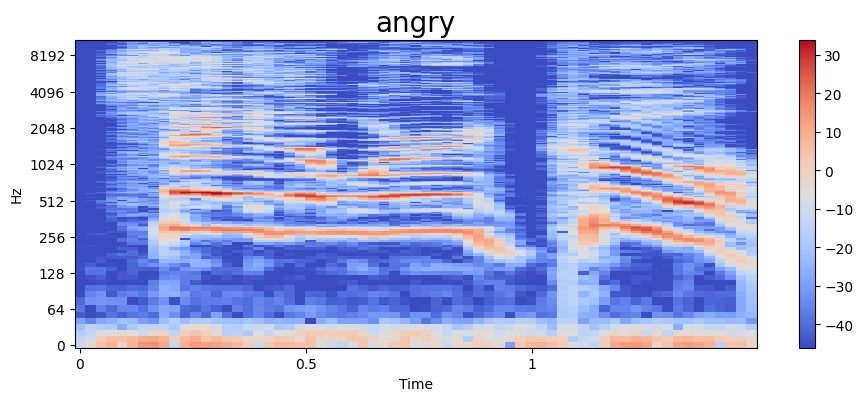

In [9]:

emotion="angry"
path=df['Speech'][df['Labels']==emotion][24] 
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

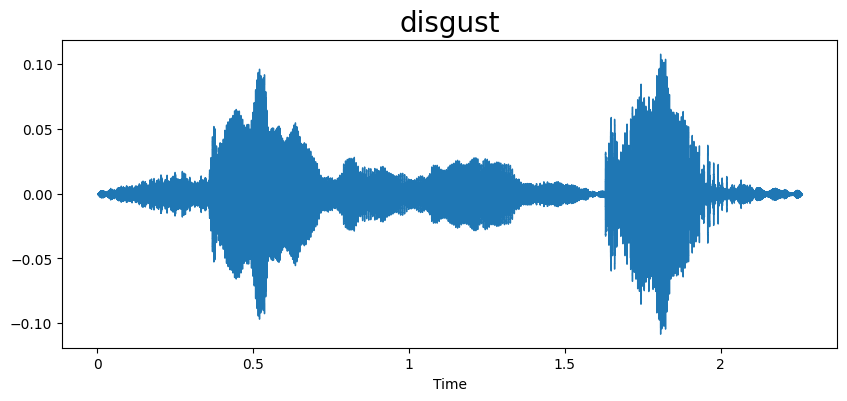

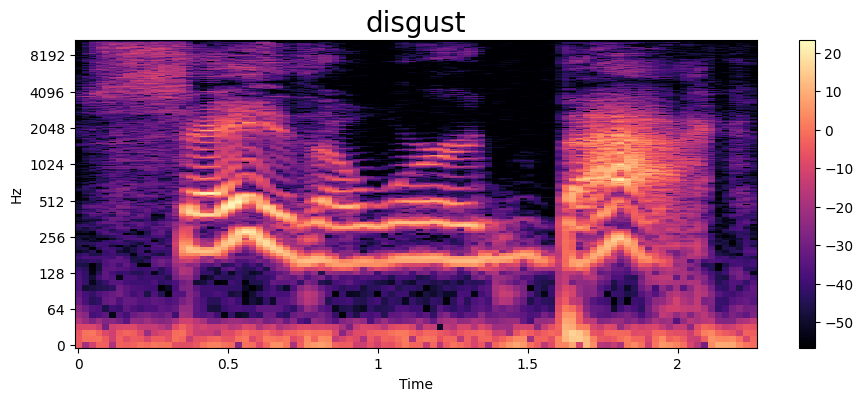

In [10]:
emotion="disgust"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

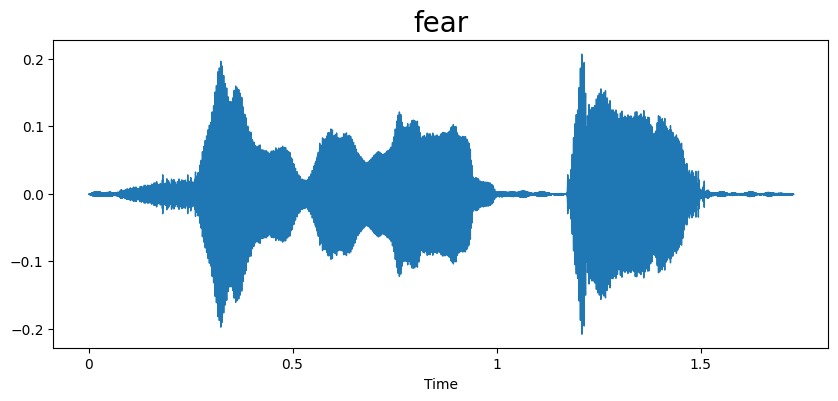

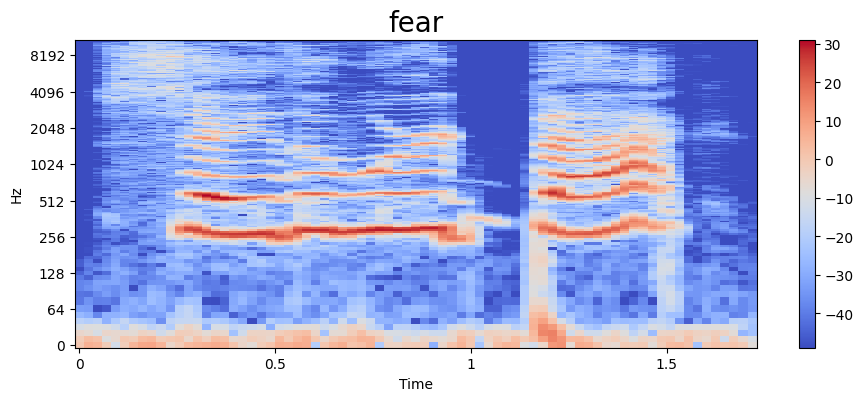

In [11]:
    emotion="fear"
    path=np.array(df["Speech"][df["Labels"]==emotion])[0]
    data,sampling_rate=librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectrogram(data,sampling_rate,emotion)
    Audio(path)

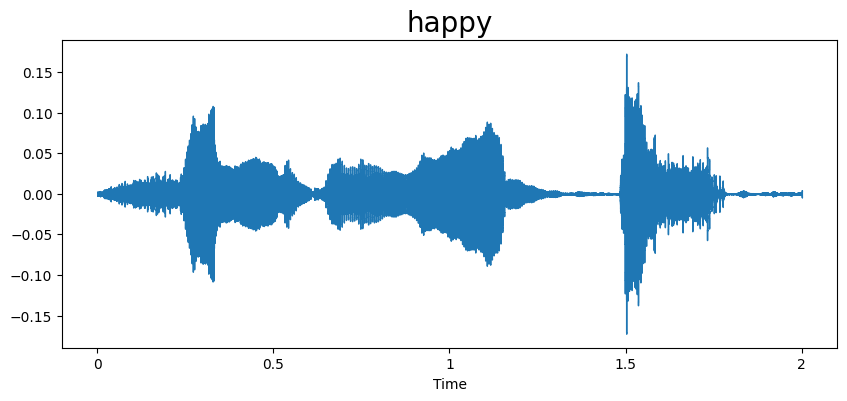

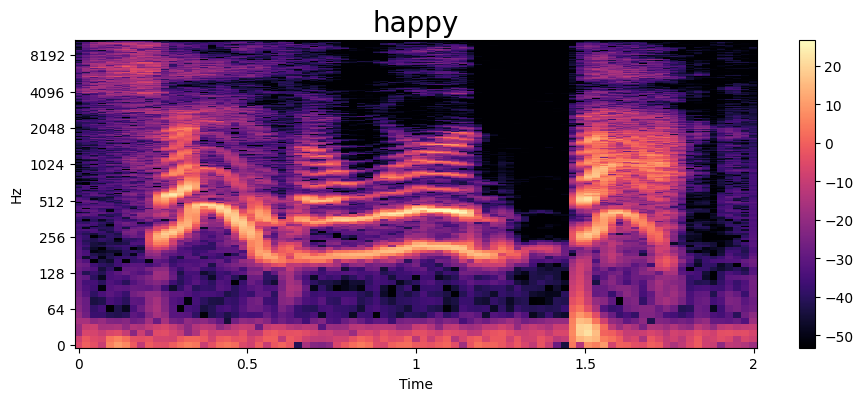

In [12]:
emotion="happy"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

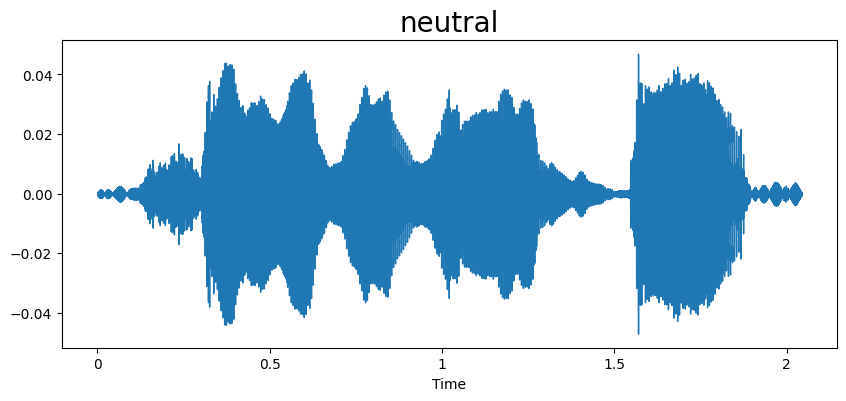

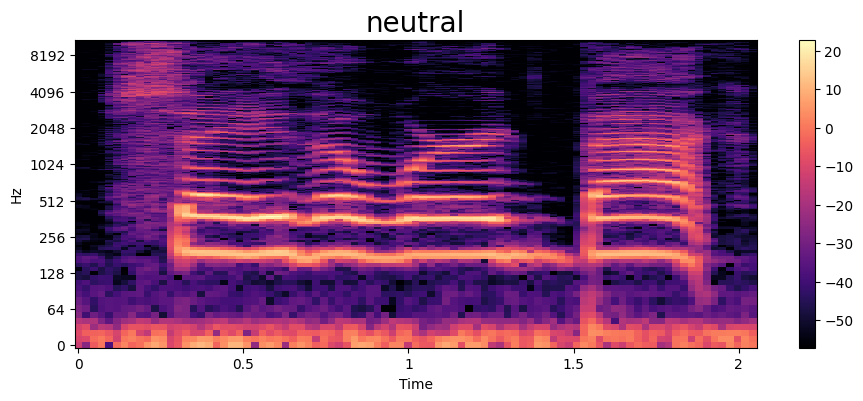

In [13]:
emotion="neutral"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

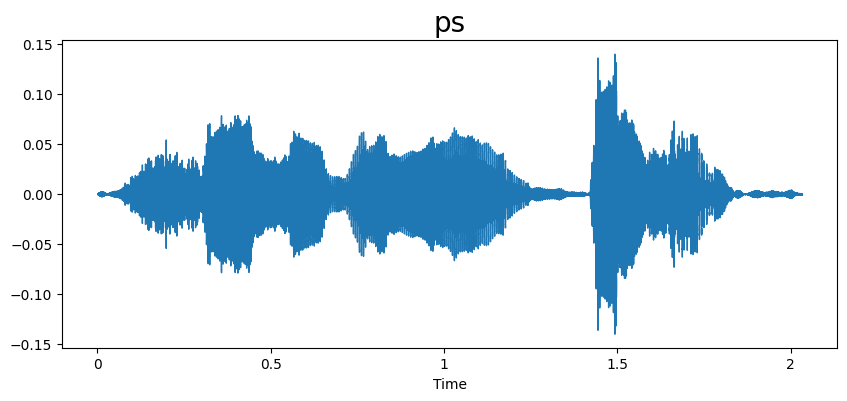

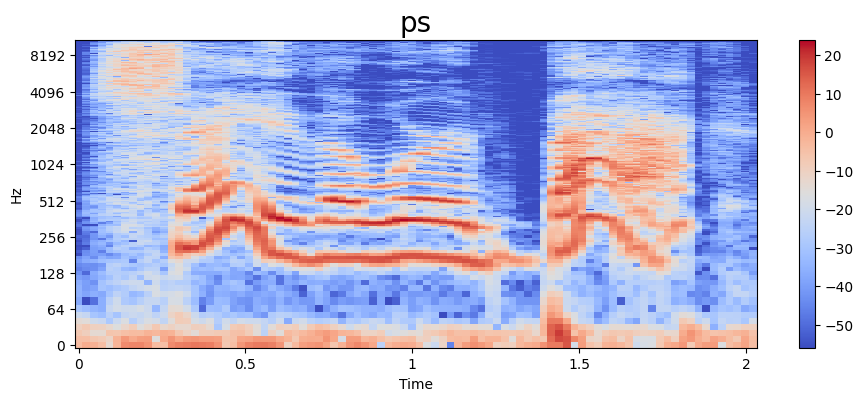

In [14]:
emotion="ps"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

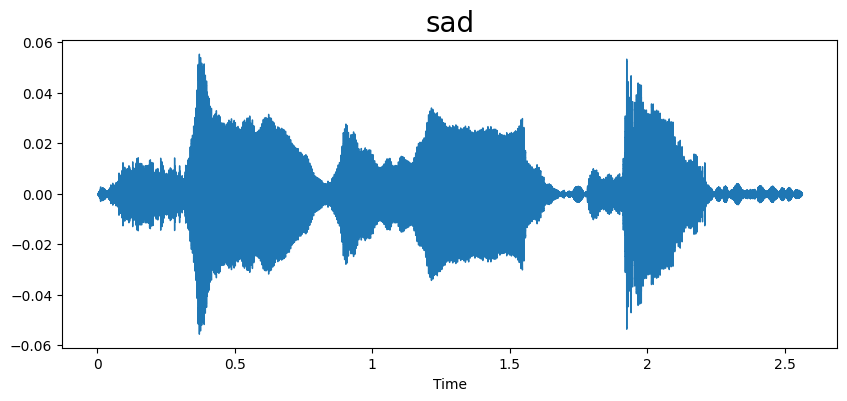

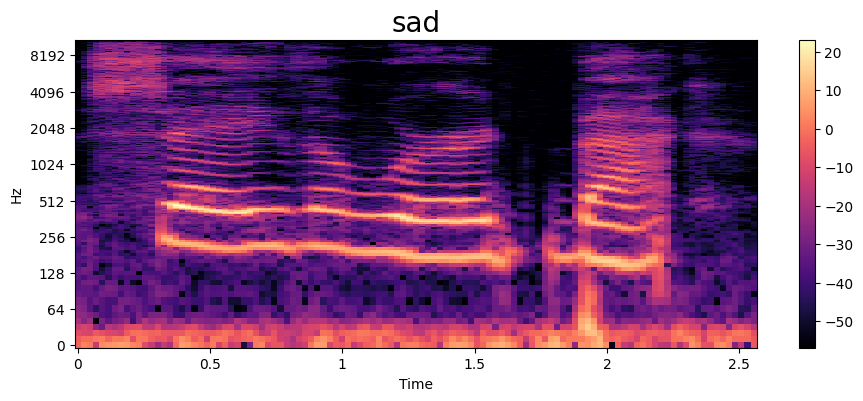

In [15]:
emotion="sad"
path=np.array(df["Speech"][df["Labels"]==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

### Feature Extraction

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50).T, axis=0)  # sr= sampling rate
    return mfcc

In [17]:
# Assuming df['Speech'][0] contains the file path
extracted_mfcc = extract_mfcc(df['Speech'][0])
print(extracted_mfcc)

[-3.96986206e+02  7.74405365e+01 -1.95927906e+01 -2.16666889e+01
 -2.11275506e+00  1.00753632e+01 -2.03667068e+01 -6.09244919e+00
 -7.21228361e+00 -5.57365894e-01 -1.83255327e+00  2.02101603e-01
  7.27550924e-01  1.31773770e+00  2.88633800e+00  2.85579133e+00
 -4.71292162e+00 -4.43651056e+00 -1.62115920e+00 -1.02398405e+01
 -7.55126143e+00 -1.79688025e+00 -7.03765202e+00  9.43658447e+00
  8.35585499e+00  2.17123604e+01  1.92169895e+01  2.03489265e+01
  1.34133663e+01  8.33917141e+00  3.94722581e-01  5.11131477e+00
  9.56873894e+00  5.45486784e+00  2.50996375e+00 -1.82390714e+00
  4.86896276e+00  9.31392384e+00  2.08915043e+00 -1.90649104e+00
 -2.81360650e+00  2.74743104e+00  6.84037018e+00  1.99077332e+00
 -3.56792164e+00 -1.43776029e-01  1.18106842e+00  2.65043116e+00
 -1.06421590e+00  4.57544947e+00]


In [18]:
# here the above output . we use these values as input.

In [19]:
X_mfcc=df['Speech'].apply(lambda x: extract_mfcc(x))

In [20]:
print(X_mfcc)

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600914, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: Speech, Length: 2800, dtype: object


In [21]:
# Here we are converting the  above noraml dataframe into two dimensional array
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 50)

In [22]:
# The above output we convert the normal data into two dimensional array.
# So here No.of samples= 2800 and No. of features= 50 

In [23]:
X=np.expand_dims(X,-1)
X.shape

(2800, 50, 1)

In [24]:
# the above output is format which is accept by LSTM model

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Labels"] = label_encoder.fit_transform(df["Labels"])
#This will replace the string labels in the "Labels" column with corresponding integer values.

In [26]:
from keras.utils import to_categorical
y = to_categorical(df["Labels"])
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [27]:
# so here we got LabelEncoder. 1 means the corresponding output label is enable.
print(y.shape)
# this will give 2800 rows and 7 columns.

(2800, 7)


## Create the LSTM Model

In [28]:
# # Train the model
# history=model.fit(X,y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout

model = Sequential ([
    LSTM(123, return_sequences=False, input_shape=(50,1)),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(7, activation="softmax")
    ])
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [30]:
# Train the model
history = model.fit(X, y, validation_data=(X, y), epochs=50, batch_size=512, shuffle=True)

# Evaluate the model on a separate test dataset
evaluation = model.evaluate(X, y)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

Epoch 1/50
6/6 [==============================] - 29s 3s/step - loss: 1.9222 - accuracy: 0.1939 - val_loss: 1.8621 - val_accuracy: 0.3125
Epoch 2/50
6/6 [==============================] - 7s 1s/step - loss: 1.8371 - accuracy: 0.2921 - val_loss: 1.7378 - val_accuracy: 0.4179
Epoch 3/50
6/6 [==============================] - 7s 1s/step - loss: 1.6945 - accuracy: 0.3732 - val_loss: 1.4961 - val_accuracy: 0.4968
Epoch 4/50
6/6 [==============================] - 6s 1s/step - loss: 1.4222 - accuracy: 0.4786 - val_loss: 1.1583 - val_accuracy: 0.5596
Epoch 5/50
6/6 [==============================] - 6s 1s/step - loss: 1.1548 - accuracy: 0.5504 - val_loss: 0.8526 - val_accuracy: 0.6782
Epoch 6/50
6/6 [==============================] - 6s 1s/step - loss: 0.9068 - accuracy: 0.6475 - val_loss: 0.6254 - val_accuracy: 0.7946
Epoch 7/50
6/6 [==============================] - 7s 1s/step - loss: 0.7248 - accuracy: 0.7207 - val_loss: 0.5061 - val_accuracy: 0.8521
Epoch 8/50
6/6 [========================

In [32]:
# Make prediction on the Test data
y_pred = model.predict(X)

#Convert Predictions to Class Labels:
y_pred_labels = np.argmax(y_pred, axis=1)

88/88 [==============================] - 5s 36ms/step


In [33]:
print(y_pred_labels)

[0 0 0 ... 6 6 6]


In [35]:
print("Length of y_true:", len(y))
print("Length of y_pred_labels:", len(y_pred_labels))


Length of y_true: 2800
Length of y_pred_labels: 2800
